<a href="https://colab.research.google.com/github/blackpandaapkm/perceptions/blob/main/perceptions_(And)_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'input1':[0,0,1,1],
    'input2':[0,1,0,1],
    'output':[0,0,0,1]
}

In [3]:
df = pd.DataFrame(data)
df

,input1,input2,output
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


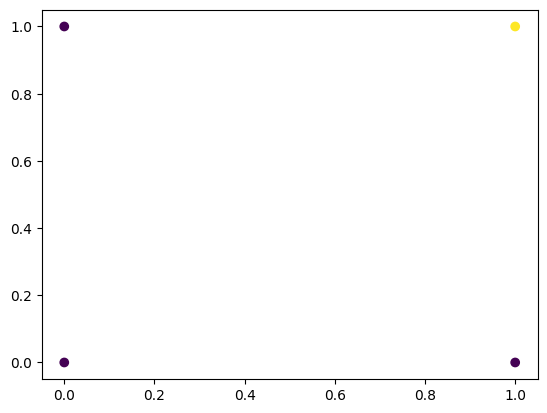

In [4]:
plt.scatter(df['input1'],df['input2'],c=df['output'])

In [5]:
X = df[['input1','input2']].values
y = df['output'].values
X,y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([0, 0, 0, 1]))

In [6]:
X.shape[1]

2

In [7]:
np.ones(X.shape[1])

array([1., 1.])

In [8]:
g = np.insert(X,0,1,axis=1)
g.shape[1]

3

In [9]:
g


array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [10]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  lr = 0.1
  w = np.ones(X.shape[1]) # column value w=[1,1,1]

  for i in range(100):
    sample = np.random.randint(4) #3
    y_hat = step(np.dot(X[sample],w)) # 1/0
    w = w + lr*(y[sample]-y_hat)*X[sample]  #[1.1,1.1,1.1]
  return w

In [11]:
def step(value):
  return 1 if value>=0 else 0

In [12]:
w = perceptron(X,y)
w

array([-0.6,  0.4,  0.5])

In [13]:
m = -(w[1]/w[2])
b = -(w[0]/w[2])
m,b

(-0.8, 1.1999999999999995)

(-2.0, 2.0)

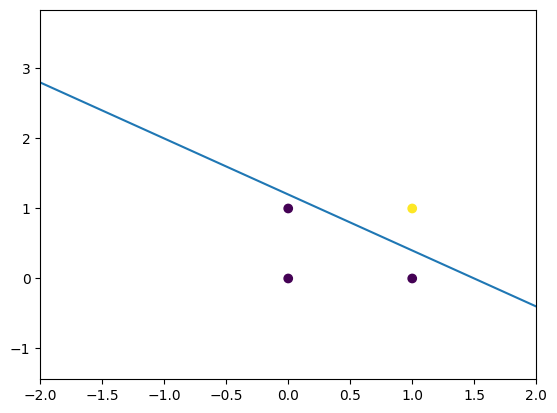

In [14]:
x_line = np.linspace(-3,3,30)
y_line = m*x_line+b
plt.scatter(df['input1'],df['input2'],c=df['output'])
plt.plot(x_line,y_line)
plt.xlim(-2,2)

In [15]:
 np.linspace(-30,20,25)

array([-30.        , -27.91666667, -25.83333333, -23.75      ,
       -21.66666667, -19.58333333, -17.5       , -15.41666667,
       -13.33333333, -11.25      ,  -9.16666667,  -7.08333333,
        -5.        ,  -2.91666667,  -0.83333333,   1.25      ,
         3.33333333,   5.41666667,   7.5       ,   9.58333333,
        11.66666667,  13.75      ,  15.83333333,  17.91666667,
        20.        ])

In [16]:
## perceptron main code
def perceptron(X,y):
     X=np.insert(X,0,1,axis=1)
     w=np.ones(X.shape[1])
     lr=0.1
     m = []
     b = []
     for i in range(105):
       sample = np.random.randint(0,4)
       pred = step(np.dot(X[sample],w))
       w = w + lr*(y[sample]-pred)*X[sample]
       m.append(-(w[1]/w[2]))
       b.append(-(w[0]/w[2]))
     return m,b

In [17]:
m,b = perceptron(X,y)

In [18]:
from matplotlib.animation import FuncAnimation

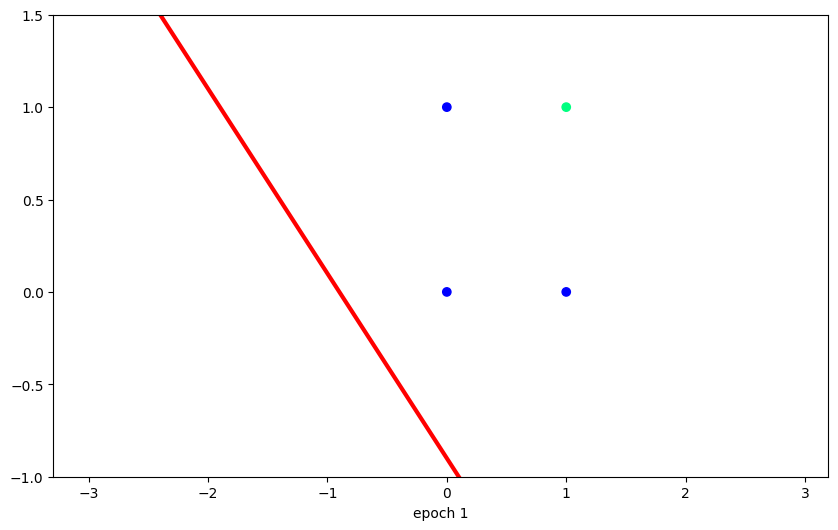

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(-3,3,0.1) # https://stackoverflow.com/questions/62106028/what-is-the-difference-between-np-linspace-and-np-arange
y_line = x*m[0]+b[0]
ax.scatter(X[:,0],X[:,1], c=y, cmap='winter')
line, = ax.plot(x,y_line,'r-', linewidth=3)
plt.ylim(-1,1.5)

def update(i):
  label = 'epoch {0}'.format(i+1)
  line.set_ydata(x*m[i]+b[i])
  ax.set_xlabel(label)

anim = FuncAnimation(fig, update,repeat = True, frames=100, interval=100)

In [20]:
anim

In [21]:
from matplotlib import rc # https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
rc('animation', html='jshtml')
anim